In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [26]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3f9688f9615b4905ac51c6a765daa457 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='t7WnXYT6ucf53aWRT1Z_gSFB29ciLfPgYzFvW_3K5ijf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3f9688f9615b4905ac51c6a765daa457.get_object(Bucket='lifeexpectancydata-donotdelete-pr-2qg4cpdsrzfzus',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Visualisation

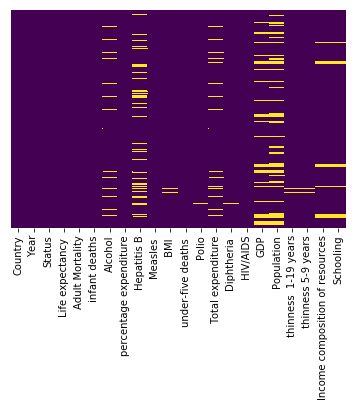

In [27]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [28]:
print('\n Data shape: ',data.shape)
print('\n Columns in data set: ',data.columns)


 Data shape:  (2938, 22)

 Columns in data set:  Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [29]:
print('\n',data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [30]:
print('\n',data.corr())


                                      Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.170033        -0.079052   
Life expectancy                  0.170033          1.000000        -0.696359   
Adult Mortality                 -0.079052         -0.696359         1.000000   
infant deaths                   -0.037415         -0.196557         0.078756   
Alcohol                         -0.052990          0.404877        -0.195848   
percentage expenditure           0.031400          0.381864        -0.242860   
Hepatitis B                      0.104333          0.256762        -0.162476   
Measles                         -0.082493         -0.157586         0.031176   
 BMI                             0.108974          0.567694        -0.387017   
under-five deaths               -0.042937         -0.222529         0.094146   
Polio                            0.094158          0.465556        -0.274823   
Total expenditure                0.090

In [31]:
print('\n',data.isnull().sum(axis=0))


 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [32]:
print('\n',data.isnull().sum(axis=0))


 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


# Data preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Status'] = lb.fit_transform(data['Status'])

In [34]:
data = data.drop('Country', axis=1)
data.fillna(value=data.mean(),inplace=True)
data_shape = data.shape[0]
data_shape

2938

# Implementing linear regression model

In [35]:
X = data.drop(['Life expectancy '], axis=1).values
y = data['Life expectancy '].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state=80)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
y_prediction = lr.predict(X_test)
y_prediction

array([74.46655674, 78.87399467, 71.58313774, ..., 78.71642691,
       73.65695951, 67.72068121])

In [39]:
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
print('\naccuracy(R^2): {}%'.format(lr.score(X_test, y_test)*100))
print('\nmae: {}'.format(mean_absolute_error(y_test, y_prediction)))
print('\nrmse: {}'.format(np.sqrt(mean_squared_error(y_test, y_prediction))))


accuracy(R^2): 80.96525309473272%

mae: 3.037665413368803

rmse: 4.061072548954602


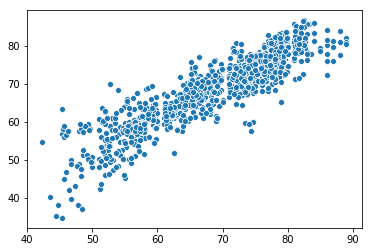

In [40]:
#LR_scatter_graph
sns.scatterplot(x=y_test,y=y_prediction)
plt.show()

In [41]:
demo_pred=lr.predict([[2015,0,263,62,0.01,71.27962362,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1]])
demo_pred

array([63.09031412])

# Deployment

In [1]:
#only if you are working with IBM watson studio
#run following code
# !pip install watson-machine-learning-client


In [3]:
# from watson_machine_learning_client import WatsonMachineLearningAPIClient


In [4]:

# wml_credentials={
#   "apikey": #add your api key here."--" ,
#    "instance_id": #add your instance id key here."--" ,,
#   "url": #add your url key here."--" ,
#    }
#this all can get from IBM machine learning service credentials

In [5]:
# client=WatsonMachineLearningAPIClient(wml_credentials)


In [6]:
#  model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "--", 
#                client.repository.ModelMetaNames.AUTHOR_EMAIL: "--@gmail.com", 
#                 client.repository.ModelMetaNames.NAME: "--"}

In [7]:
# model_artifact =client.repository.store_model(#model_object
#     , meta_props=model_props)

In [8]:
# published_model_uid = client.repository.get_model_uid(model_artifact)

# published_model_uid

In [9]:
# deployment = client.deployments.create(published_model_uid, name="LifeExpectancy")

In [68]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [69]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/2860fbe3-33ca-48ca-a4ba-d09de284f468/deployments/9f047e98-0dc0-449b-845a-729b330087ef/online'